In [1]:
import glob, os, h5py
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm

# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [2]:
def evidence(f):
    return f.attrs['log_evidence'] - f['samples'].attrs['lognl']

# Reading the file directly from here

In [4]:
df = pd.read_csv('results.csv')

In [5]:
df

Unnamed: 0           name      ranking      fix_lnb     relax_lnb
0              0  190409_114158     4.244331     9.558380      5.314048
1              1  190701_223118     3.970222    11.301643      7.331421
2              2  190409_032650     3.736220    11.120391      7.384171
3              3  190605_021909     3.644766    12.771765      9.127000
4              4  190426_012707     3.574376    10.856903      7.282527
...          ...            ...          ...          ...           ...
1045        1045  190519_230244  -157.725236   604.206402    761.931638
1046        1046  190612_195828  -217.291139   406.788341    624.079481
1047        1047  190519_230231  -219.163118   840.912410   1060.075528
1048        1048  190518_223900  -221.878322   367.513293    589.391614
1049        1049  190621_081615 -4301.386103  8315.252956  12616.639059

[1050 rows x 5 columns]

In [7]:
ogc = h5py.File('/work/ahnitz/WWW/4ogc/4-ogc.hdf','r')

In [8]:
ogc.keys()

<KeysViewHDF5 ['H1_chisq', 'H1_end_time', 'H1_sg_chisq', 'H1_snr', 'L1_chisq', 'L1_end_time', 'L1_sg_chisq', 'L1_snr', 'V1_chisq', 'V1_end_time', 'V1_sg_chisq', 'V1_snr', 'ifar', 'mass1', 'mass2', 'name', 'obs', 'pastro', 'spin1z', 'spin2z', 'stat', 'time', 'trig']>

In [22]:
stat = []
for name in tqdm(df['name']):
    ii = np.where(ogc['name'][:]==name.encode())[0]
    stat.append(ogc['stat'][:][ii])

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1050/1050 [07:08<00:00,  2.45it/s]


In [23]:
df

Unnamed: 0           name      ranking      fix_lnb     relax_lnb
0              0  190409_114158     4.244331     9.558380      5.314048
1              1  190701_223118     3.970222    11.301643      7.331421
2              2  190409_032650     3.736220    11.120391      7.384171
3              3  190605_021909     3.644766    12.771765      9.127000
4              4  190426_012707     3.574376    10.856903      7.282527
...          ...            ...          ...          ...           ...
1045        1045  190519_230244  -157.725236   604.206402    761.931638
1046        1046  190612_195828  -217.291139   406.788341    624.079481
1047        1047  190519_230231  -219.163118   840.912410   1060.075528
1048        1048  190518_223900  -221.878322   367.513293    589.391614
1049        1049  190621_081615 -4301.386103  8315.252956  12616.639059

[1050 rows x 5 columns]

In [30]:
statlist = [s[0] for s in stat]

In [31]:
statlist

[-0.24506807327270508,
 4.952718734741211,
 2.2184219360351562,
 3.8621826171875,
 -1.3915082216262817,
 3.6810498237609863,
 1.2663861513137817,
 1.7355140447616577,
 1.5626667737960815,
 -8.498062133789062,
 0.1639639139175415,
 -4.386221885681152,
 0.848423421382904,
 -0.35186970233917236,
 -6.3215813636779785,
 -2.6638810634613037,
 1.0014475584030151,
 2.6382055282592773,
 4.148149490356445,
 0.15759027004241943,
 1.0656062364578247,
 -3.3063836097717285,
 0.6734241247177124,
 -9.03266716003418,
 -6.2880754470825195,
 -5.210293769836426,
 -9.190603256225586,
 -1.3933734893798828,
 -7.716082572937012,
 2.2045493125915527,
 -9.69247817993164,
 -3.840117931365967,
 -6.2013726234436035,
 -3.2828474044799805,
 2.5228919982910156,
 -1.9556039571762085,
 -1.907872200012207,
 -3.25219464302063,
 -1.1500117778778076,
 -3.0736281871795654,
 -3.9291460514068604,
 3.5065813064575195,
 -5.769704818725586,
 0.7882125973701477,
 1.2288234233856201,
 2.214114189147949,
 1.4827972650527954,
 -4.79

In [32]:
df['stat'] = statlist

In [33]:
df

Unnamed: 0           name      ranking      fix_lnb     relax_lnb  \
0              0  190409_114158     4.244331     9.558380      5.314048   
1              1  190701_223118     3.970222    11.301643      7.331421   
2              2  190409_032650     3.736220    11.120391      7.384171   
3              3  190605_021909     3.644766    12.771765      9.127000   
4              4  190426_012707     3.574376    10.856903      7.282527   
...          ...            ...          ...          ...           ...   
1045        1045  190519_230244  -157.725236   604.206402    761.931638   
1046        1046  190612_195828  -217.291139   406.788341    624.079481   
1047        1047  190519_230231  -219.163118   840.912410   1060.075528   
1048        1048  190518_223900  -221.878322   367.513293    589.391614   
1049        1049  190621_081615 -4301.386103  8315.252956  12616.639059   

          stat  
0    -0.245068  
1     4.952719  
2     2.218422  
3     3.862183  
4    -1.391508  
...        ...  
1045  2.434241  
1046 -1.029691  
1047 -3.614769  
1048 -2.869363  
1049 -1.468428  

[1050 rows x 6 columns]

In [35]:
df.to_csv('results-rho.csv')

In [49]:
name = '190621_081615'
for key in ogc.keys():
    print(key, ogc[key][np.where(ogc['name'][:]==name.encode())])

H1_chisq [-0.]
H1_end_time [1.24514019e+09]
H1_sg_chisq [1.]
H1_snr [5.22586918]
L1_chisq [2.20174643]
L1_end_time [1.24514019e+09]
L1_sg_chisq [1.]
L1_snr [5.65667248]
V1_chisq [-1.]
V1_end_time [-1.]
V1_sg_chisq [-1.]
V1_snr [-1.]
ifar [3.31562079e-07]
mass1 [1.30483023]
mass2 [1.61228341]
name [b'190621_081615']
obs [b'HLV']
pastro [-1.]
spin1z [0.03045209]
spin2z [0.0395527]
stat [-1.46842778]
time [1.24514019e+09]
trig [b'HL']


# Background

I need to figure out a way to convert the chunk number to the GW name so that I can locate the 'stat'. I'd better do it in the copy of making ini file

In [8]:
b = pd.read_csv('./post/background.csv')

In [9]:
b

Unnamed: 0         name       ranking       fix_lnb     relax_lnb
0               0  chunk70_663     32.979141     78.438030     45.458890
1               1  chunk97_213     28.174368     84.923274     56.748906
2               2  chunk62_582     16.720414     92.286157     75.565742
3               3  chunk17_497     13.829248     92.057008     78.227759
4               4  chunk74_411     13.195566    248.564570    235.369004
...           ...          ...           ...           ...           ...
95752       95752  chunk31_675 -20213.689802  23985.477046  44199.166848
95753       95753  chunk26_163 -23366.429459  24613.027914  47979.457373
95754       95754   chunk3_302 -24573.001154  26786.629929  51359.631083
95755       95755  chunk17_288 -27773.827506  23585.803754  51359.631260
95756       95756  chunk16_513 -33168.175935   3424.729524  36592.905459

[95757 rows x 5 columns]

Text(0, 0.5, '$\\#$ of events')

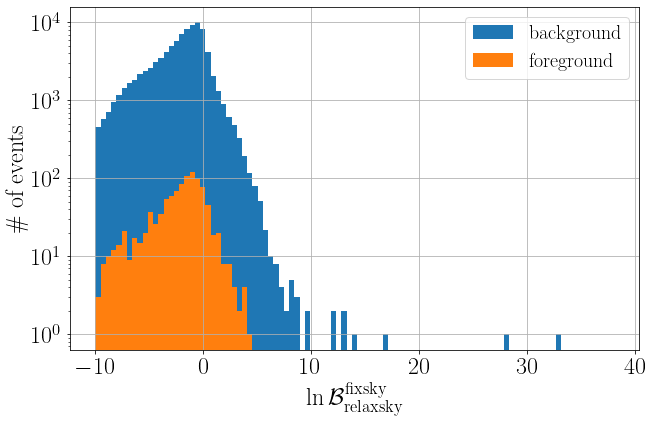

In [10]:
bins = np.linspace(-10,np.max(b['ranking'])+5,100)
plt.hist(b['ranking'],bins=bins,label='background')
plt.hist(df['ranking'],bins=bins,label='foreground')
plt.yscale('log')
plt.legend()
plt.xlabel('$\ln \mathcal{B}^\mathrm{fixsky}_\mathrm{relaxsky}$')
plt.ylabel('$\#$ of events')
#plt.savefig('result.png',bbox_inches='tight')

# Making a figure for the paper:

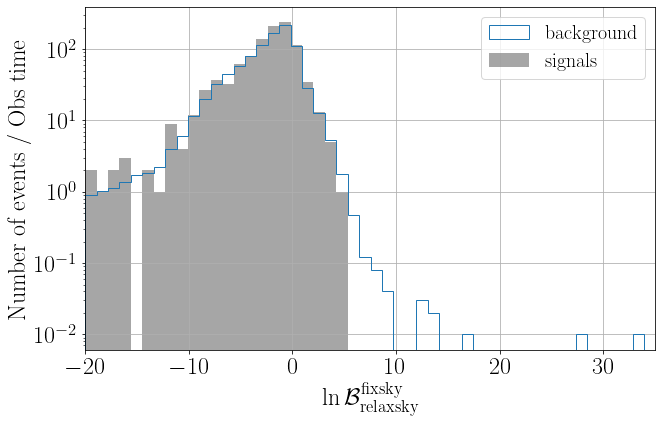

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

low=-20
bins = np.linspace(low,np.max(b['ranking'])+1,50)
counts, _ = np.histogram(b['ranking'],bins=bins)

ax.hist(bins[:-1], bins, weights=counts/100,histtype="step",label='background')
ax.hist(df['ranking'],bins=bins,alpha=0.7,color='grey',label='signals')
ax.set_yscale('log')
ax.legend()
ax.set_xlim(low,35)
ax.set_xlabel('$\ln \mathcal{B}^\mathrm{fixsky}_\mathrm{relaxsky}$')
ax.set_ylabel('Number of events / Obs time')
fig.savefig('result.png',bbox_inches='tight')

(array([8.9000e+01, 1.0300e+02, 1.1400e+02, 1.3500e+02, 1.7100e+02,
        1.8200e+02, 2.2600e+02, 4.0200e+02, 6.1000e+02, 1.1740e+03,
        2.0160e+03, 3.2310e+03, 4.4440e+03, 5.7910e+03, 7.9140e+03,
        1.1471e+04, 1.6961e+04, 2.1762e+04, 1.1116e+04, 2.8740e+03,
        1.2720e+03, 5.3900e+02, 1.7800e+02, 4.8000e+01, 1.2000e+01,
        8.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-20.        , -18.89838489, -17.79676977, -16.69515466,
        -15.59353955, -14.49192443, -13.39030932, -12.2886942 ,
        -11.18707909, -10.08546398,  -8.98384886,  -7.88223375,
         -6.78061864,  -5.67900352,  -4.57738841,  -3.4757733 ,
         -2.37415818,  -1.27254307,  -0.17092795,   0.93068716,
          

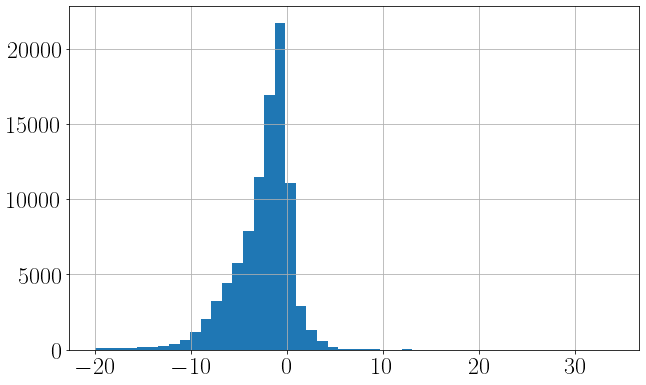

In [16]:
counts, bins = np.histogram(b['ranking'],bins=bins)
plt.hist(bins[:-1], bins, weights=counts)

In [17]:
counts, bins = np.histogram(b['ranking'],bins=bins)

In [18]:
counts

array([   89,   103,   114,   135,   171,   182,   226,   402,   610,
        1174,  2016,  3231,  4444,  5791,  7914, 11471, 16961, 21762,
       11116,  2874,  1272,   539,   178,    48,    12,     8,     4,
           0,     0,     3,     2,     0,     0,     1,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     1,     0,
           0,     0,     0,     1])

In [19]:
len(counts)

49

In [20]:
np.sum(counts)

92855

In [21]:
bins

array([-20.        , -18.89838489, -17.79676977, -16.69515466,
       -15.59353955, -14.49192443, -13.39030932, -12.2886942 ,
       -11.18707909, -10.08546398,  -8.98384886,  -7.88223375,
        -6.78061864,  -5.67900352,  -4.57738841,  -3.4757733 ,
        -2.37415818,  -1.27254307,  -0.17092795,   0.93068716,
         2.03230227,   3.13391739,   4.2355325 ,   5.33714761,
         6.43876273,   7.54037784,   8.64199295,   9.74360807,
        10.84522318,  11.9468383 ,  13.04845341,  14.15006852,
        15.25168364,  16.35329875,  17.45491386,  18.55652898,
        19.65814409,  20.7597592 ,  21.86137432,  22.96298943,
        24.06460455,  25.16621966,  26.26783477,  27.36944989,
        28.471065  ,  29.57268011,  30.67429523,  31.77591034,
        32.87752545,  33.97914057])

In [22]:
len(bins)

50

In [23]:
for i in range(3):
    print(i)
    k  = np.where(bins>df['ranking'][i])[0]
    print(np.sum(counts[k-1])/100)

0
2.58
1
7.97
2
7.97


In [68]:
df

name      ranking      fix_lnb     relax_lnb
0     190409_114158     4.244331     9.558380      5.314048
1     190701_223118     3.970222    11.301643      7.331421
2     190409_032650     3.736220    11.120391      7.384171
3     190605_021909     3.644766    12.771765      9.127000
4     190426_012707     3.574376    10.856903      7.282527
...             ...          ...          ...           ...
1045  190519_230244  -157.725236   604.206402    761.931638
1046  190612_195828  -217.291139   406.788341    624.079481
1047  190519_230231  -219.163118   840.912410   1060.075528
1048  190518_223900  -221.878322   367.513293    589.391614
1049  190621_081615 -4301.386103  8315.252956  12616.639059

[1050 rows x 4 columns]

Text(0, 0.5, 'Number of events')

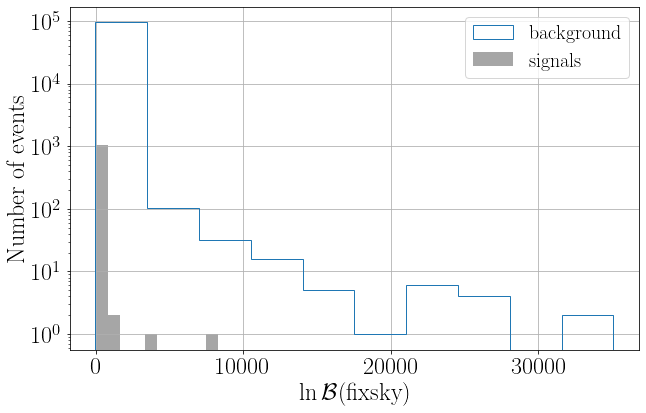

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(b['fix_lnb'], histtype="step",label='background')
ax.hist(df['fix_lnb'],alpha=0.7,color='grey',label='signals')
ax.set_yscale('log')
ax.legend()
#ax.set_xlim(low,35)
ax.set_xlabel('$\ln \mathcal{B}(\mathrm{fixsky})$')
ax.set_ylabel('Number of events')